# Ch3 분석 과제 : 주가 데이터 캔들 그래프 및 이동평균선

## 주가 데이터 불러오기

In [82]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import FinanceDataReader as fdr

In [93]:
# 카카오 주가 데이터

df_kakao = fdr.DataReader('035720', '2010-01-01')
df_kakao.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,14109,14892,13868,14732,158976,0.044082
2010-01-05,14652,15113,14491,14853,124156,0.008213
2010-01-06,14973,15093,14652,14913,72453,0.004040
2010-01-07,14912,15012,14471,14732,99241,-0.012137
2010-01-08,14752,14752,14070,14632,114818,-0.006788


In [86]:
df_kakao.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3610 entries, 2010-01-04 to 2024-08-20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3610 non-null   int64  
 1   High    3610 non-null   int64  
 2   Low     3610 non-null   int64  
 3   Close   3610 non-null   int64  
 4   Volume  3610 non-null   int64  
 5   Change  3610 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 197.4 KB


In [108]:
df_kakao.describe()

,Open,High,Low,Close,Volume,Change
count,3610.000000,3610.000000,3610.000000,3610.000000,3.610000e+03,3610.000000
mean,37727.983934,38320.684488,37144.862050,37802.259003,8.375256e+05,0.000536
std,30067.013183,30538.176360,29613.045925,30098.982960,1.275162e+06,0.023413
min,0.000000,0.000000,0.000000,13146.000000,0.000000e+00,-0.103681
25%,19068.000000,19268.000000,18786.000000,19048.000000,1.551460e+05,-0.012733
50%,24687.500000,25087.000000,24215.500000,24617.000000,4.166670e+05,0.000000
75%,48650.000000,49400.000000,48137.500000,48750.000000,1.074297e+06,0.011576
max,172000.000000,173000.000000,161000.000000,169500.000000,1.889515e+07,0.155512


In [118]:
# 이상치 제거

df_kakao = df_kakao[~(df_kakao==0).any(axis=1)]
df_kakao.describe()

,Open,High,Low,Close,Volume,Change
count,3408.000000,3408.000000,3408.000000,3408.000000,3.408000e+03,3408.000000
mean,37820.136150,38423.638204,37230.989730,37797.628521,8.491922e+05,0.000568
std,30021.560057,30496.977394,29563.912998,30001.010754,1.292200e+06,0.024097
min,13146.000000,13186.000000,12905.000000,13146.000000,9.641000e+03,-0.103681
25%,19082.250000,19288.000000,18786.000000,19027.000000,1.587795e+05,-0.013567
50%,24697.500000,25088.500000,24275.500000,24647.500000,4.276095e+05,-0.001328
75%,48762.500000,49512.500000,48262.500000,48812.500000,1.096044e+06,0.012646
max,172000.000000,173000.000000,161000.000000,169500.000000,1.889515e+07,0.155512


## 종가 기준 선 그래프

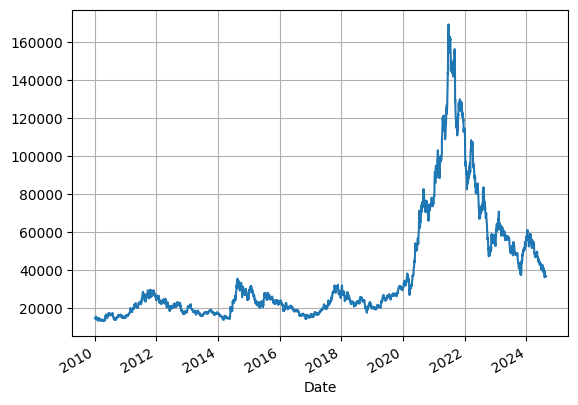

In [120]:
df_kakao['Close'].plot()
plt.grid()
plt.show()

## 캔들 그래프

In [98]:
import plotly.graph_objects as go
import plotly.subplots as ms

In [135]:
# 최근 1년치 자료 추출

df_kakao_short = df_kakao[df_kakao.index>pd.to_datetime("2023-08-19")]
df_kakao_short.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-08-21,48500,49450,48250,48400,1010367,-0.001032
2023-08-22,48550,49400,48400,48650,1131155,0.005165
2023-08-23,48700,49700,48450,48900,1344907,0.005139
2023-08-24,49450,50100,48900,49100,1735760,0.004090
2023-08-25,48000,48550,47600,48100,1330506,-0.020367


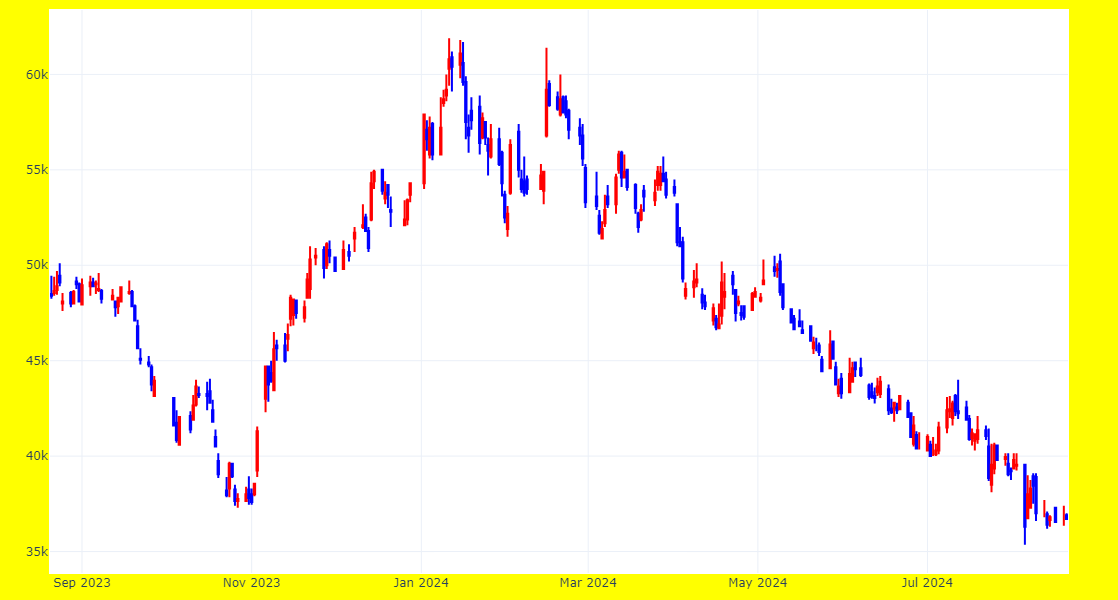

In [137]:
fig = go.Figure(data = [go.Candlestick(x=df_kakao_short.index, open=df_kakao_short['Open'], high=df_kakao_short['High'],
                                       low=df_kakao_short['Low'], close=df_kakao_short['Close'],
                                       increasing_line_color='red', decreasing_line_color='blue')])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_layout(autosize=False, width=1000, height=600, margin=dict(l=50, r=50, b=10, t=10, pad=1), paper_bgcolor='Yellow')
fig.show()

## 이동평균선

Pandas 패키지의 rolling 함수
-시계열 데이터에서 특정 크기의 window를 이동하면서 각 window 내의 데이터마다 특정 함수 적용.
-window=5로 설정할 경우 현재 데이터 포함 과거 5개 데이터 사용

In [145]:
# 한글 폰트

from matplotlib import rcParams, font_manager, rc
rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumBarunGothic'
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font', family=font_name)

In [141]:
# 이동평균

df_kakao['Moving_3'] = df_kakao['Close'].rolling(window=3).mean()
df_kakao['Moving_10'] = df_kakao['Close'].rolling(window=10).mean()
df_kakao['Moving_20'] = df_kakao['Close'].rolling(window=20).mean()
df_kakao['Moving_100'] = df_kakao['Close'].rolling(window=100).mean()
df_kakao.tail()

,Open,High,Low,Close,Volume,Change,Moving_3,Moving_10,Moving_20,Moving_100
Date,,,,,,,,,,
2024-08-13,36950,37100,36200,36400,1205169,-0.018868,36833.333333,38010.0,39130.0,44774.0
2024-08-14,36650,36900,36300,36800,1074501,0.010989,36766.666667,37770.0,38910.0,44622.0
2024-08-16,37300,37350,36550,36550,1170171,-0.006793,36583.333333,37445.0,38680.0,44458.5
2024-08-19,36650,37400,36350,36650,1211287,0.002736,36666.666667,37155.0,38445.0,44289.0
2024-08-20,36900,37000,36650,36700,95122,0.001364,36633.333333,37195.0,38227.5,44118.0


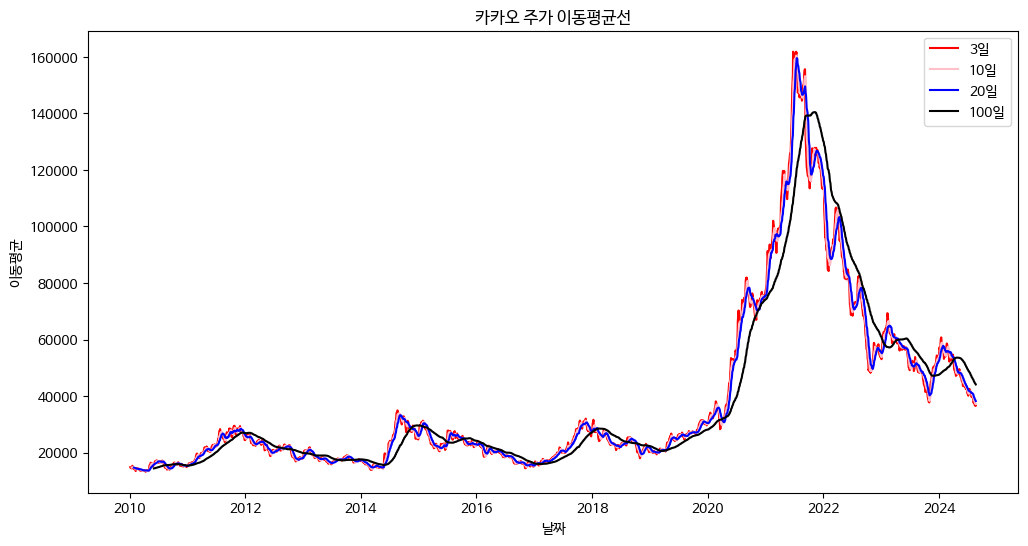

In [165]:
# 이동평균선 그래프

plt.figure(figsize=(12,6))
plt.plot(df_kakao['Moving_3'], label='3일', color='red')
plt.plot(df_kakao['Moving_10'], label='10일', color='pink')
plt.plot(df_kakao['Moving_20'], label='20일', color='blue')
plt.plot(df_kakao['Moving_100'], label='100일', color='black')

plt.title('카카오 주가 이동평균선')
plt.xlabel('날짜')
plt.ylabel('이동평균')
plt.legend()

plt.show()